In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC


In [3]:
wine_data=pd.read_csv("winequality.csv",sep=",")
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine_data["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# mean for each class in quality columns

In [7]:
scaler=StandardScaler()
x=wine_data.drop(["quality"],axis=1)
y_t=wine_data["quality"]
x_std=scaler.fit_transform(x)
x_std

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [8]:
type(y_t)

pandas.core.series.Series

In [9]:
x=wine_data.iloc[:,0:11].values
y=wine_data.iloc[:,11].values
x_std=scaler.fit_transform(x)
x_std

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [10]:
type(y)

numpy.ndarray

In [11]:
np.set_printoptions(precision=1) # to specify number of float number of decimal point  
mean_vectors=[]
for grade_qualities in range(3,9):
    mean_vectors.append(np.mean(x_std[y==grade_qualities],axis=0))
    print('Mean vector quality %s :%s\n'%(grade_qualities,mean_vectors[grade_qualities-3]))
    print("-----------------------------------------------------------------")
print(mean_vectors)

Mean vector quality 3 :[ 0.   2.  -0.5  0.1  0.7 -0.5 -0.7  0.4  0.6 -0.5 -0.4]

-----------------------------------------------------------------
Mean vector quality 4 :[-0.3  0.9 -0.5  0.1  0.1 -0.3 -0.3 -0.1  0.5 -0.4 -0.1]

-----------------------------------------------------------------
Mean vector quality 5 :[-0.1  0.3 -0.1 -0.   0.1  0.1  0.3  0.2 -0.  -0.2 -0.5]

-----------------------------------------------------------------
Mean vector quality 6 :[ 0.  -0.2  0.  -0.  -0.1 -0.  -0.2 -0.1  0.   0.1  0.2]

-----------------------------------------------------------------
Mean vector quality 7 :[ 0.3 -0.7  0.5  0.1 -0.2 -0.2 -0.3 -0.3 -0.1  0.5  1. ]

-----------------------------------------------------------------
Mean vector quality 8 :[ 0.1 -0.6  0.6  0.  -0.4 -0.2 -0.4 -0.8 -0.3  0.6  1.6]

-----------------------------------------------------------------
[array([ 0. ,  2. , -0.5,  0.1,  0.7, -0.5, -0.7,  0.4,  0.6, -0.5, -0.4]), array([-0.3,  0.9, -0.5,  0.1,  0.1, -0.3,

# calculate the within_class_matrix 
* calculate the covariance matrix for each sperate quality grade
* sum these individual class covariance matrics up 

دلوقتي انا عندي 6 كلاسز , روحت كاني فصلتهم ل ماتركس تانية فيها صفوف الي فيها الكواليتي دي بس وبدأت احسب متوسط كل فيتشر , فانا مستني فيكتور للمتوسط فيه 11 قيمة لكل كواليتي 

طب وكم فيكتور للمتوسط 6 علي حسب عدد الكواليتي 

ودلوقتي عشان احسب كوفيرنس لكل كواليتي محتاجة اخد كل نقطةبعد ما كانت صف احولها لعمود واطرحها من فيكتور المتوسط وبعدين اخد نفس الفيكتور اعمله ترانسبوز واضربهم في بعض ,وفي الاخر اجمع مصفوفة كل كلاس مع التاني 

![alt text](<WhatsApp Image 2024-11-14 at 22.05.15_b0edb6f5.jpg>)

In [12]:
with_in_matrix=np.zeros((11,11))
for quality_class_label, corresponding_mean_vector in zip(range(3,9),mean_vectors) :
    class_scatter_for_each_class=np.zeros((11,11))
    for row_index in range(len(x_std)):
        if y[row_index]==quality_class_label:
            row_vector_to_coloumn_vector=x_std[row_index].reshape(11,1)
            row_vector_to_coloumn_vector_transposed=row_vector_to_coloumn_vector.T
            class_scatter_for_each_class+=(row_vector_to_coloumn_vector-corresponding_mean_vector).dot((row_vector_to_coloumn_vector-corresponding_mean_vector).T)
            with_in_matrix+=class_scatter_for_each_class
with_in_matrix

array([[ 5430770.5,  -998629.6,  3654716.1,   802338.8,   458762.7,
         -572158. ,  -600833.6,  3629371.6, -3188428.8,  1200560.3,
          286773.1],
       [ -998629.6,  4771423.3, -2350002.5,   192014.1,   275160.4,
          229535.3,   680734.2,   151051.8,  1157584. ,  -895152.2,
         -514371. ],
       [ 3654716.1, -2350002.5,  5249686.9,   662997.3,  1246539.9,
          -95226.3,   348703.9,  2087553.5, -2427212.1,  1698520.2,
          742079.6],
       [  802338.8,   192014.1,   662997.3,  4419560. ,   107413.5,
         1037918.6,  1069319.4,  1830093.5,   -54707.3,   236710.2,
          563477.8],
       [  458762.7,   275160.4,  1246539.9,   107413.5,  6168012.3,
          161644. ,   504348.4,   906034.1, -1221336. ,  2660858.9,
         -775758.3],
       [ -572158. ,   229535.3,   -95226.3,  1037918.6,   161644. ,
         4901169.2,  3650100.2,   -39045.6,   611229.5,   462856.7,
          159075.2],
       [ -600833.6,   680734.2,   348703.9,  1069319.4,   

# calculate the between class matrix 

* The between-class scatter matrix measures the separation between different
* 𝑐 :is the number of classes.
* 𝑁𝑖 : is the number of samples in class 𝑖
* 𝜇𝑖 : is the mean vector of class 𝑖
* 𝜇 : is the overall mean vector of all classe

![alt text](image.png)


In [13]:
over_all_mean_vector_of_all_classes=np.mean(x_std,axis=0)
between_matrix_for_all_classes=np.zeros((11,11))
for i ,mean_vec in enumerate(mean_vectors):
    number_of_sampels=x_std[y==i+3,:].shape[0]
    
    mean_vec=mean_vec.reshape(11,1)
    over_all_mean_vector_of_all_classes=over_all_mean_vector_of_all_classes.reshape(11,1)
    between_matrix_for_all_classes+=number_of_sampels*(mean_vec-over_all_mean_vector_of_all_classes).dot((mean_vec-over_all_mean_vector_of_all_classes).T)

between_matrix_for_all_classes

array([[  30.9,  -78.1,   52. ,    6.4,  -23.8,  -12.6,  -38. ,  -33.7,
         -13.6,   52.6,   99.5],
       [ -78.1,  256.6, -142.7,   -7.9,   81. ,   22. ,   99.4,  100.7,
          42.5, -154.7, -280.3],
       [  52. , -142.7,   93.1,   11. ,  -45.9,  -20.2,  -60.6,  -63.1,
         -27.9,   93.6,  176.5],
       [   6.4,   -7.9,   11. ,    5.3,   -4.3,   -7. ,   -8.1,   -8.5,
          -1.5,    8.7,   21.7],
       [ -23.8,   81. ,  -45.9,   -4.3,   29.7,   13.8,   42. ,   40.8,
           9.4,  -52.6, -104.3],
       [ -12.6,   22. ,  -20.2,   -7. ,   13.8,   23.5,   46.4,   30.1,
          -8.4,  -27.7,  -73.7],
       [ -38. ,   99.4,  -60.6,   -8.1,   42. ,   46.4,  118.4,   75.6,
         -13.2,  -85.8, -196.9],
       [ -33.7,  100.7,  -63.1,   -8.5,   40.8,   30.1,   75.6,   64.5,
           5.5,  -75.4, -162. ],
       [ -13.6,   42.5,  -27.9,   -1.5,    9.4,   -8.4,  -13.2,    5.5,
          21.5,  -19. ,  -20.8],
       [  52.6, -154.7,   93.6,    8.7,  -52.6,  -27.7,

In [ ]:
over_all_mean=np.mean(x_std,axis=0)
# Compute between-class scatter matrix S_b
between_class_scatter=np.zeros((11,11))
for labels ,mean_vector in zip(range(3,9),mean_vectors):
 between_matrix_for_each_class=np.zeros((11,11))
 sub_matrix_class= x_std[y==labels]
 number_of_sampels=sub_matrix_class.shape[0]
 frist=mean_vector.reshape(11,1)-over_all_mean.reshape(11,1)
 between_matrix_for_each_class+=number_of_sampels*(frist).dot(frist.T)
 between_class_scatter+=between_matrix_for_each_class

between_class_scatter


array([[  30.9,  -78.1,   52. ,    6.4,  -23.8,  -12.6,  -38. ,  -33.7,
         -13.6,   52.6,   99.5],
       [ -78.1,  256.6, -142.7,   -7.9,   81. ,   22. ,   99.4,  100.7,
          42.5, -154.7, -280.3],
       [  52. , -142.7,   93.1,   11. ,  -45.9,  -20.2,  -60.6,  -63.1,
         -27.9,   93.6,  176.5],
       [   6.4,   -7.9,   11. ,    5.3,   -4.3,   -7. ,   -8.1,   -8.5,
          -1.5,    8.7,   21.7],
       [ -23.8,   81. ,  -45.9,   -4.3,   29.7,   13.8,   42. ,   40.8,
           9.4,  -52.6, -104.3],
       [ -12.6,   22. ,  -20.2,   -7. ,   13.8,   23.5,   46.4,   30.1,
          -8.4,  -27.7,  -73.7],
       [ -38. ,   99.4,  -60.6,   -8.1,   42. ,   46.4,  118.4,   75.6,
         -13.2,  -85.8, -196.9],
       [ -33.7,  100.7,  -63.1,   -8.5,   40.8,   30.1,   75.6,   64.5,
           5.5,  -75.4, -162. ],
       [ -13.6,   42.5,  -27.9,   -1.5,    9.4,   -8.4,  -13.2,    5.5,
          21.5,  -19. ,  -20.8],
       [  52.6, -154.7,   93.6,    8.7,  -52.6,  -27.7,

# Eigen values and vectors 

In [15]:
eig_values,eigen_vec=np.linalg.eig(np.linalg.inv(with_in_matrix).dot(between_matrix_for_all_classes))

In [16]:
eig_values

array([ 1.4e-04+0.0e+00j,  2.2e-05+0.0e+00j,  7.8e-06+0.0e+00j,
        1.9e-06+0.0e+00j,  1.1e-06+0.0e+00j,  8.1e-21+0.0e+00j,
        3.6e-20+0.0e+00j, -2.0e-21+4.4e-21j, -2.0e-21-4.4e-21j,
       -4.1e-21+0.0e+00j, -7.8e-21+0.0e+00j])

In [17]:
eigen_vec
# number of eigen vector == number of dimension 


array([[ 1.4e-01+0.j , -4.0e-01+0.j ,  1.6e-01+0.j ,  6.6e-01+0.j ,
        -2.4e-02+0.j , -3.5e-01+0.j , -2.1e-01+0.j , -2.5e-01+0.2j,
        -2.5e-01-0.2j, -4.9e-01+0.j , -6.0e-01+0.j ],
       [-4.4e-01+0.j , -4.9e-01+0.j ,  2.3e-01+0.j , -1.8e-01+0.j ,
         2.9e-01+0.j ,  9.0e-02+0.j , -1.3e-01+0.j , -6.5e-02-0.1j,
        -6.5e-02+0.1j, -2.8e-01+0.j ,  5.1e-02+0.j ],
       [-5.7e-03+0.j , -1.7e-01+0.j ,  3.6e-01+0.j , -1.2e-01+0.j ,
         4.2e-01+0.j , -1.8e-02+0.j , -2.2e-01+0.j ,  2.1e-01-0.4j,
         2.1e-01+0.4j,  2.5e-02+0.j ,  7.3e-02+0.j ],
       [ 1.1e-01+0.j , -2.6e-01+0.j ,  3.0e-01+0.j ,  2.3e-01+0.j ,
        -3.8e-01+0.j ,  1.8e-01+0.j , -1.6e-01+0.j , -3.5e-01+0.2j,
        -3.5e-01-0.2j,  2.0e-01+0.j ,  1.5e-01+0.j ],
       [-2.0e-01+0.j , -6.2e-02+0.j , -1.0e-01+0.j ,  1.1e-01+0.j ,
         2.5e-01+0.j , -3.7e-01+0.j ,  1.0e-01+0.j , -7.7e-02+0.3j,
        -7.7e-02-0.3j,  7.4e-01+0.j ,  9.7e-03+0.j ],
       [-1.3e-02+0.j ,  6.6e-02+0.j , -4.2e-01+0.j

In [18]:
for i in range (len(eig_values)):
    #بياخد كل الابجن فيكتور بتاعت الفيتشر الأولانية مثلا وهكذاوالمصفوفة دي عبارة عن صفوف من الفيكتورز
    eigen_vector_reshaped=eigen_vec[:,i].reshape(11,1)
    print(f"Eigen_vector{i+1} is {eigen_vector_reshaped.real}\n")
    print(f"Eigen_value {i+1} is {eig_values[i].real}\n")
    print("--------------------------")

Eigen_vector1 is [[ 0.1]
 [-0.4]
 [-0. ]
 [ 0.1]
 [-0.2]
 [-0. ]
 [-0.2]
 [-0.3]
 [-0. ]
 [ 0.4]
 [ 0.7]]

Eigen_value 1 is 0.00013905032011075547

--------------------------
Eigen_vector2 is [[-0.4]
 [-0.5]
 [-0.2]
 [-0.3]
 [-0.1]
 [ 0.1]
 [ 0.3]
 [ 0.5]
 [-0.3]
 [-0.1]
 [ 0.2]]

Eigen_value 2 is 2.2451469773107637e-05

--------------------------
Eigen_vector3 is [[ 0.2]
 [ 0.2]
 [ 0.4]
 [ 0.3]
 [-0.1]
 [-0.4]
 [ 0.5]
 [-0.5]
 [-0.1]
 [ 0. ]
 [-0.1]]

Eigen_value 3 is 7.757501158357632e-06

--------------------------
Eigen_vector4 is [[ 6.6e-01]
 [-1.8e-01]
 [-1.2e-01]
 [ 2.3e-01]
 [ 1.1e-01]
 [-1.0e-01]
 [ 8.9e-02]
 [-4.1e-01]
 [ 4.0e-01]
 [ 2.2e-04]
 [-3.2e-01]]

Eigen_value 4 is 1.925857250908465e-06

--------------------------
Eigen_vector5 is [[-0. ]
 [ 0.3]
 [ 0.4]
 [-0.4]
 [ 0.2]
 [ 0.4]
 [-0.3]
 [ 0.4]
 [-0.2]
 [-0.1]
 [ 0.2]]

Eigen_value 5 is 1.1468226884292847e-06

--------------------------
Eigen_vector6 is [[-0.4]
 [ 0.1]
 [-0. ]
 [ 0.2]
 [-0.4]
 [-0.1]
 [-0.4]
 [ 0.4]
 [

# Order the eigenpairs in descending order with respect to eigenvalues

In [19]:
eig_pairs=[]
for i in range (len(eig_values)):
    if eig_values[i]<0:
        eig_pairs.append((- eig_values[i], - eigen_vec[:, i]))
    else:
        eig_pairs.append((eig_values[i],eigen_vec[:, i]))
eig_pairs=sorted(eig_pairs,key= lambda k:k[0],reverse=True)

print(" eigen_values in decreasing order:\n")
for i in range (len(eig_pairs)):
    print("---------------------------------")
    print("Eigen_values:")
    print(eig_pairs[i][0].real)
    print("\nassociated vector")
    print(eig_pairs[i][1].real)
    


 eigen_values in decreasing order:

---------------------------------
Eigen_values:
0.00013905032011075547

associated vector
[ 0.1 -0.4 -0.   0.1 -0.2 -0.  -0.2 -0.3 -0.   0.4  0.7]
---------------------------------
Eigen_values:
2.2451469773107637e-05

associated vector
[-0.4 -0.5 -0.2 -0.3 -0.1  0.1  0.3  0.5 -0.3 -0.1  0.2]
---------------------------------
Eigen_values:
7.757501158357632e-06

associated vector
[ 0.2  0.2  0.4  0.3 -0.1 -0.4  0.5 -0.5 -0.1  0.  -0.1]
---------------------------------
Eigen_values:
1.925857250908465e-06

associated vector
[ 6.6e-01 -1.8e-01 -1.2e-01  2.3e-01  1.1e-01 -1.0e-01  8.9e-02 -4.1e-01
  4.0e-01  2.2e-04 -3.2e-01]
---------------------------------
Eigen_values:
1.1468226884292847e-06

associated vector
[-0.   0.3  0.4 -0.4  0.2  0.4 -0.3  0.4 -0.2 -0.1  0.2]
---------------------------------
Eigen_values:
3.603988639586214e-20

associated vector
[-0.2 -0.1 -0.2 -0.2  0.1 -0.4  0.3  0.6 -0.1 -0.2  0.5]
---------------------------------
Eigen_

# Analysis of LDA

Show the explained variance by each respective eigen_vector

In [20]:
print("variance explained :\n")
over_all_eigen_values=sum(eig_values)
for i ,j in enumerate(eig_pairs):
    print(f"eigen value {i+1} is : {j[0].real/over_all_eigen_values.real*(100)}")

variance explained :

eigen value 1 is : 80.68747738377311
eigen value 2 is : 13.028035160991806
eigen value 3 is : 4.501486934880918
eigen value 4 is : 1.1175275486836702
eigen value 5 is : 0.6654729716704788
eigen value 6 is : 2.091305878450077e-14
eigen value 7 is : 4.682899930468372e-15
eigen value 8 is : 4.522588845866352e-15
eigen value 9 is : 2.4026701080590303e-15
eigen value 10 is : 1.1683088606183858e-15
eigen value 11 is : 1.1683088606183858e-15


In [21]:
eig_pairs[0][1].shape

(11,)

# Take the frist two eigenvectors rataining the most variance 


In [22]:
w = np.hstack((eig_pairs[0][1].reshape(11, 1), eig_pairs[1][1].reshape(11, 1)))
print(w.real)



[[ 0.1 -0.4]
 [-0.4 -0.5]
 [-0.  -0.2]
 [ 0.1 -0.3]
 [-0.2 -0.1]
 [-0.   0.1]
 [-0.2  0.3]
 [-0.3  0.5]
 [-0.  -0.3]
 [ 0.4 -0.1]
 [ 0.7  0.2]]


# Project the data onto the new axes (linear discriminants)

In [23]:
x_lda=x_std.dot(w)
x_lda.shape

(1599, 2)

# LDA VS.PCA

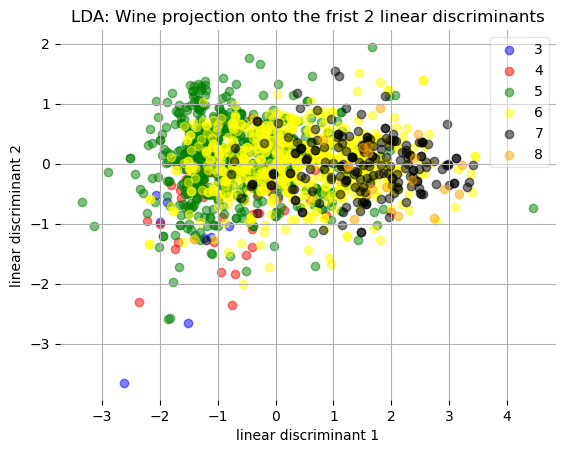

In [24]:
def plot_step_lda():
    fig=plt.figure()
    ax=plt.subplot(111)
    for label,color in zip(range(3,9),('blue','red','green',"yellow",'black','orange')):
        plt.scatter(x=x_lda[:,0].real[y==label],
                    y=x_lda[:,1].real[y==label],
                    color=color,
                    alpha=0.5,
                    label=label)
    plt.xlabel('linear discriminant 1')
    plt.ylabel('linear discriminant 2')
    leg=plt.legend(loc='upper right',fancybox=True)
    leg.get_frame().set_alpha(0.5)
    #sets its transparency to 50%. This makes the legend's background slightly transparent, improving visibility of the plot behind it
    plt.title('LDA: Wine projection onto the frist 2 linear discriminants')
     
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False) 

    plt.grid()
    plt.show()

plot_step_lda()
# visualize the decision boundaries of the Linear Discriminant Analysis (LDA) model.
#  This visualization helps to understand how well the LDA model is able to separate different classes


In [25]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_std)

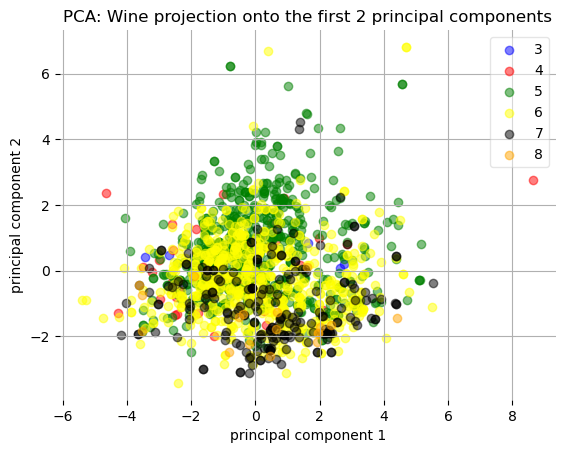

In [26]:
def plot_step_pca():
    fig=plt.figure()
    ax=plt.subplot(111)
    for label,color in zip(range(3,9),('blue','red','green',"yellow",'black','orange')):
        plt.scatter(x=x_pca[:,0][y==label],
                    y=x_pca[:,1][y==label],
                    color=color,
                    alpha=0.5,
                    label=label)
    plt.xlabel('principal component 1')
    plt.ylabel('principal component 2')
    leg=plt.legend(loc='upper right',fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('PCA: Wine projection onto the first 2 principal components')
     
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)   
    ax.spines["left"].set_visible(False)
    plt.grid()
    plt.show()
plot_step_pca()

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
scaler=StandardScaler()
x_std=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


Let me explain how using fit_transform() on test data causes data leakage with a concrete example:

Let's say we have this simple dataset:

```python
# Training data
x_train = [1, 2, 3, 4, 5]  # mean = 3, std = 1.58

# Test data 
x_test = [10, 11, 12, 13, 14]  # mean = 12, std = 1.58
```

Scenario 1 (CORRECT approach - no data leakage):
```python
# 1. Fit and transform training data
scaler.fit_transform(x_train)
# Calculates mean = 3, std = 1.58
# Transforms training data to: [-1.26, -0.63, 0, 0.63, 1.26]

# 2. Only transform test data using training parameters
scaler.transform(x_test)
# Uses mean = 3, std = 1.58 from training data
# Transforms test data to: [4.43, 5.06, 5.69, 6.32, 6.96]
```

Scenario 2 (WRONG approach - with data leakage):
```python
# 1. Fit and transform training data
scaler.fit_transform(x_train)
# Training data becomes: [-1.26, -0.63, 0, 0.63, 1.26]

# 2. Fit and transform test data (WRONG!)
scaler.fit_transform(x_test)
# Calculates NEW mean = 12, std = 1.58
# Test data becomes: [-1.26, -0.63, 0, 0.63, 1.26]
```

Why this is a problem:
1. In Scenario 2, the test data looks artificially similar to the training data because it's been scaled using its own statistics
2. This is "leaking" information because:
   - The model sees test data that's been normalized in exactly the same way as training data
   - In real world, you won't have access to the statistics of future data
   - It creates an artificially optimistic scenario that won't exist in production

Real-world impact example:
```python
# Real-world scenario with price data

# Training data (2023 prices)
prices_train = [10, 12, 15, 11, 13]  # Average = $12

# Test data (2024 prices with inflation)
prices_test = [20, 22, 25, 21, 23]   # Average = $22

# WRONG approach (with leakage):
# Both sets would be scaled to similar ranges, hiding the real price increase
# Model wouldn't learn to handle the higher price range

# CORRECT approach:
# Test data would maintain its relative difference from training data
# Model would learn to handle different price ranges properly
```

3. Common consequences:
   - Model appears to perform better than it actually would in production
   - Fails to capture real-world variations in data distribution
   - Makes incorrect assumptions about future data

This is why it's crucial to:
1. Only fit (learn parameters) on training data
2. Apply those same parameters to transform all other data
3. Never let test data influence your preprocessing parameters



In [28]:
model=SVC(kernel='linear')

# LDA

In [29]:
lda=LDA(n_components=2)
x_train_lda=lda.fit_transform(x_train,y_train)
x_test_lda=lda.transform(x_test)

# PCA

In [30]:
pca=PCA(n_components=2)
x_train_pca=pca.fit_transform(x_train,y_train)
x_test_pca=pca.transform(x_test)

In [31]:
def train_test_lda():
    s=[]
    start_train_lda=time.time()
    model.fit(x_train_lda,y_train)
    finish_train_lda=time.time()

    start_test_lda=time.time()
    y_pred_lda=model.predict(x_test_lda)
    finish_test_lda=time.time()
    s.append(finish_train_lda-start_train_lda)
    s.append(finish_test_lda-start_test_lda)
    s.append(y_pred_lda)

    return s
    

In [32]:
def train_test_pca():
    a=[]
    start_train_pca=time.time()
    model.fit(x_train_pca,y_train)
    finish_train_pca=time.time()

    start_test_pca=time.time()
    y_pred_pca=model.predict(x_test_pca)
    finish_test_pca=time.time()
    a.append(finish_train_pca-start_train_pca)
    a.append(finish_test_pca-start_test_pca)
    a.append(y_pred_pca)

    return a

# Analysis of the training and testing times for SVC and its accuracy 

In [33]:
train_lda=0
test_lda=0
for i in  range (10):
    c=train_test_lda()
    train_lda+=c[0] # why cumulative ?
    test_lda+=c[1]
print(f"average time for training out of 10 runs for LDA{train_lda/10}")
print(f"average time for testing out of 10 runs for LDA{test_lda/10}")


average time for training out of 10 runs for LDA0.04465019702911377
average time for testing out of 10 runs for LDA0.009332776069641113


In [38]:
train_pca=0
test_pca=0
for i in  range (1):
    c=train_test_pca()
    train_pca+=c[0] # why cumulative ?
    test_pca+=c[1]
print(f"average time for trraining out of 10 runs for pca{train_pca/10}")
print(f"average time for testing out of 10 runs for pca{test_pca/10}")


average time for trraining out of 10 runs for pca5.63721489906311
average time for testing out of 10 runs for pca0.0009116172790527344


In [39]:
lda_arrray=train_test_lda()
pca_array=train_test_pca()

In [40]:
cm_lda=confusion_matrix(y_test,lda_arrray[2])
print("Confussion matrix for LDA")
print(cm_lda)
print("LDA A ccuracy :"+''+str(accuracy_score(y_test,lda_arrray[2])))

Confussion matrix for LDA
[[  0   0   2   0   0   0]
 [  0   0   0  11   0   0]
 [  0   0  21 114   0   0]
 [  0   0  24 112   6   0]
 [  0   0   3  24   0   0]
 [  0   0   1   2   0   0]]
LDA A ccuracy :0.415625


In [41]:
cm_pca=confusion_matrix(y_test,pca_array[2])
print("Confussion matrix for pca")
print(cm_lda)
print("pca A ccuracy :"+''+str(accuracy_score(y_test,pca_array[2])))

Confussion matrix for pca
[[  0   0   2   0   0   0]
 [  0   0   0  11   0   0]
 [  0   0  21 114   0   0]
 [  0   0  24 112   6   0]
 [  0   0   3  24   0   0]
 [  0   0   1   2   0   0]]
pca A ccuracy :0.44375
